## 1. Load trainning data

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
%matplotlib inline

# File name
driving_log = "../training-data/driving_log.csv"

# Read data info
rows = []
with open(driving_log) as file:
    reader = csv.reader(file)
    for row in reader:
        rows.append(row)
train_data, valid_data = train_test_split(rows, test_size=0.2)

## 2. Create data generator


In [2]:
# Define genorator for training
from random import shuffle
def generator(data, batch_size = 128):
    data_size = len(data)
    # Loop for ever in generator loop
    while 1:
        shuffle(data)
        for offset in range(0, data_size, batch_size):
            batch = data[offset:offset+batch_size]
            images = []
            mesurements = []
            for x in batch:
                # This is a work around because train data was collected on both Windows and Linux
                # Hence path file contain different deliminator ('/' and '\')
                center_image_file = x[0].split('center_')[-1]
                img = Image.open("../training-data/IMG/center_"+center_image_file)
                images.append(np.array(img))
                img.close()
                mesurements.append(float(x[3]))
                
            # Convert into np array
            x_train = np.array(images)
            y_train = np.array(mesurements)
            
            yield x_train, y_train

In [3]:
# Set batch size
batch_size=128

# generate train data
train_generator = generator(train_data, batch_size=batch_size)
validation_generator = generator(valid_data, batch_size=batch_size)

In [4]:
from keras.models import Sequential
from keras.layers import Lambda, Flatten, Dense, Cropping2D, Conv2D
from math import ceil

# Create model
model = Sequential()
model.add(Lambda(lambda x: x/128.0 - 1.0, input_shape=(160,320,3)))
# If tuple of 2 tuples of 2 ints: interpreted as ((top_crop, bottom_crop), (left_crop, right_crop))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Conv2D(24, (5, 5), activation="relu", strides=(2, 2)))
model.add(Conv2D(36, (5, 5), activation="relu", strides=(2, 2)))
model.add(Conv2D(48, (5, 5), activation="relu", strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

# Compile model
model.compile(loss="mse", optimizer="adam")
# Train model on train data
model.fit_generator(train_generator, steps_per_epoch=ceil(len(train_data)/batch_size), validation_data=validation_generator,validation_steps=ceil(len(valid_data)/batch_size), shuffle=True, epochs=50, verbose=1)

# Save whole model into .h5 file
model.save("model-1-0-3.h5")

Using TensorFlow backend.
/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/will/anacon

/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/will/anaconda3/envs/keras-GPU/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/will/anaconda3/e



Epoch 1/50
334/334 [==============================] - 59s 176ms/step - loss: 0.0171 - val_loss: 0.0164
Epoch 2/50
334/334 [==============================] - 48s 145ms/step - loss: 0.0152 - val_loss: 0.0166
Epoch 3/50
334/334 [==============================] - 48s 144ms/step - loss: 0.0151 - val_loss: 0.0180
Epoch 4/50
334/334 [==============================] - 46s 138ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 5/50
334/334 [==============================] - 46s 139ms/step - loss: 0.0149 - val_loss: 0.0160
Epoch 6/50
334/334 [==============================] - 46s 138ms/step - loss: 0.0148 - val_loss: 0.0162
Epoch 7/50
334/334 [==============================] - 46s 138ms/step - loss: 0.0141 - val_loss: 0.0159
Epoch 8/50
334/334 [==============================] - 46s 138ms/step - loss: 0.0137 - val_loss: 0.0167
Epoch 9/50
334/334 [==============================] - 46s 139ms/step - loss: 0.0134 - val_loss: 0.0202
Epoch 10/50
334/334 [==============================] - 46s 139ms/step -

In [6]:
from keras.models import load_model
model_load = load_model("model.h5")

images = []
# Use '/' if data collection ran on linux 
center_image_file = row[0].split('/')[-1]
img = Image.open("../training-data/IMG/"+center_image_file)
images.append(np.array(img))
img.close()

steering_angle = float(model_load.predict(images[0][None, :, :, :], batch_size=1))
print (steering_angle)

0.018744634464383125


In [7]:
from keras.models import load_model
model = load_model("model.h5")
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 33, 64)         36928     
__________

In [8]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:7]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

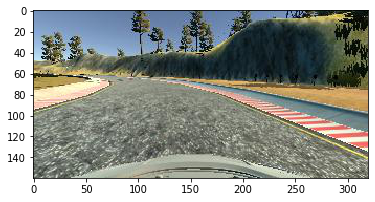

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline
img = Image.open("./examples/center-image.jpg")
img = np.array(img)
plt.imshow(img)

In [15]:
activations = activation_model.predict(img.reshape(1,160,320,3)) # Returns a list of Numpy arrays: one array per layer activation

In [16]:
def feature_maps(activation):
    featuremaps = activation.shape[3]
    plt.figure(1, figsize=(20,5))
    for featuremap in range(featuremaps):
        plt.subplot(10,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

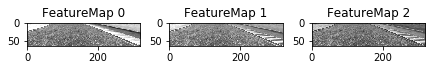

In [17]:
normalized_and_croped_layer_activation = activations[1]
feature_maps(normalized_and_croped_layer_activation)

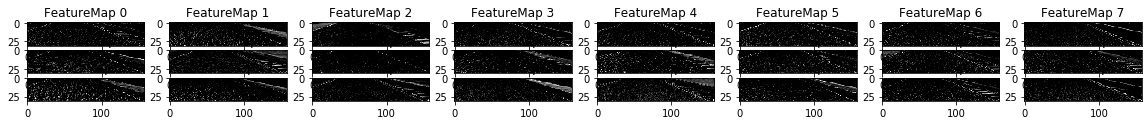

In [18]:
first_conv_layer_activation = activations[2]
feature_maps(first_conv_layer_activation)

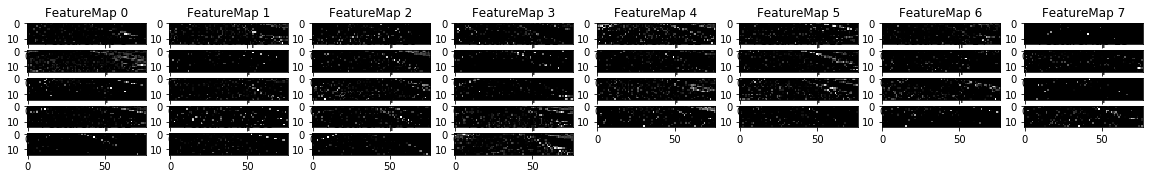

In [19]:
second_conv_layer_activation = activations[3]
feature_maps(second_conv_layer_activation)